<a href="https://colab.research.google.com/github/biotocharles/lap-prediction/blob/main/AR_TS_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install statsmodels --upgrade

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

In [4]:
df = pd.read_csv('/content/1_Daily_minimum_temps.csv.xls', index_col = 0, parse_dates= True)

/tmp/ipython-input-4-2528139283.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('/content/1_Daily_minimum_temps.csv.xls', index_col = 0, parse_dates= True)


In [5]:
X = df.values
print("shape of data: ",df.shape)
print("original dataset: ",df.head())
print("after extracting only temperatures: ", X)


shape of data:  (3650, 1)
original dataset:              Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
after extracting only temperatures:  [['20.7']
 ['17.9']
 ['18.8']
 ...
 ['13.5']
 ['15.7']
 ['13']]


IN AR MODEL we only need prev inputs to predict the output

Check stationality


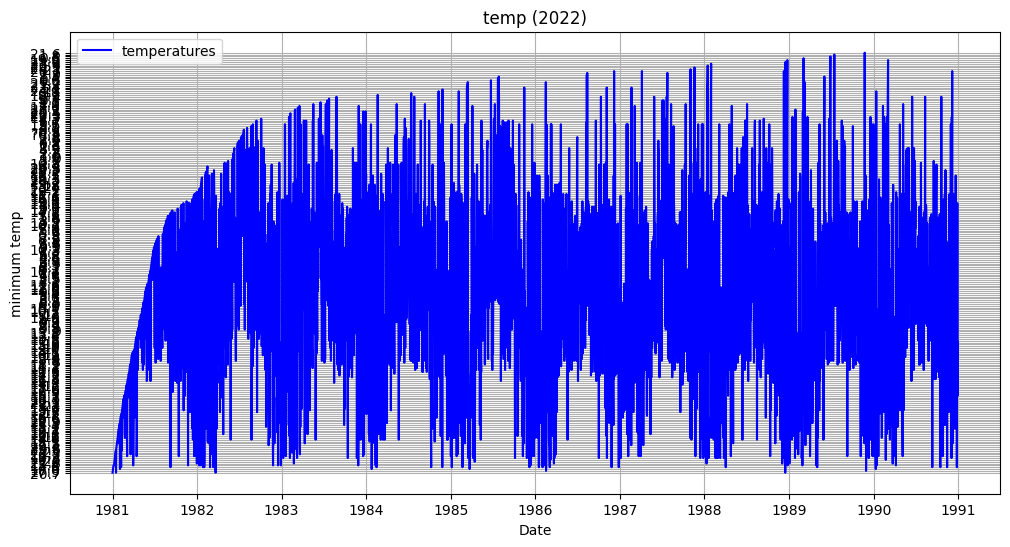

In [13]:
# Plot closing price over time
plt.figure(figsize=(12, 6))
plt.plot(df['Temp'], label='temperatures', color='blue')
plt.title("temp (2022)")
plt.xlabel("Date")
plt.ylabel("minimum temp")
plt.grid(True)
plt.legend()
plt.show()


Test for stationality: ADfuller test

In [25]:
# If you're testing something like stock closing prices
series = pd.to_numeric(df['Temp'], errors='coerce')

# Drop rows with NaN values (created when coercion fails)
series = series.dropna()

In [26]:
X = series.values


In [18]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(series)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -4.444652847181708
p-value: 0.00024723724658534517


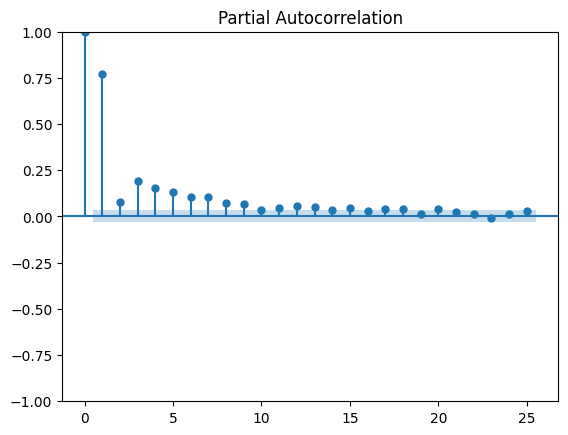

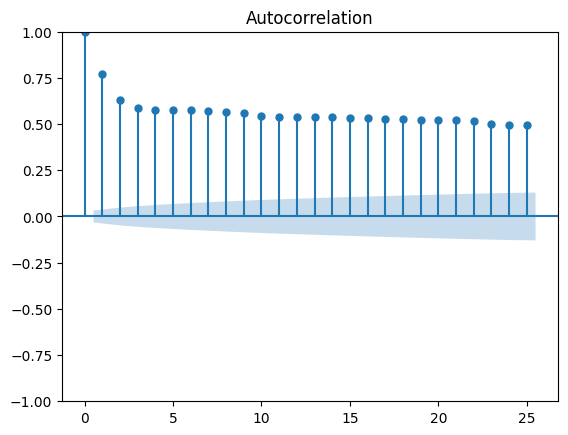

In [22]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf = plot_pacf(series,lags = 25)
acf = plot_acf(series,lags = 25)

In [27]:
train = X[:len(X)-7]
test = X[len(X)-7:]

In [28]:
model = AutoReg(train, lags = 10)
model_fit = model.fit()

In [30]:
print(model.score)

<bound method AutoReg.score of <statsmodels.tsa.ar_model.AutoReg object at 0x7efa64678ed0>>


In [33]:
pred = model_fit.predict(start = len(train), end = len(X) - 1,dynamic = False)

[11.48069869 12.65111246 13.05344584 13.03934229 12.81993332 12.66122549
 12.44373081]


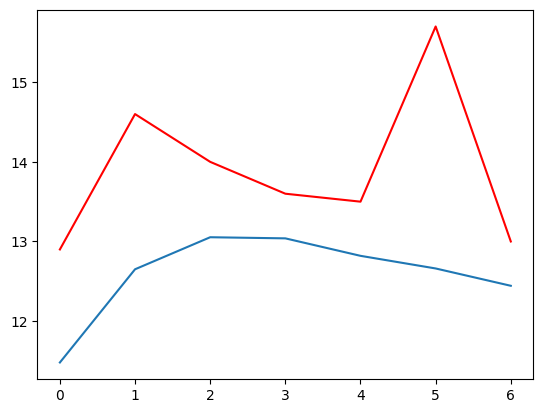

In [34]:
plt.plot(pred)
plt.plot(test, color = 'red')
print(pred)

In [35]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test,pred))
print(rmse)

1.5597141376227392
